In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten,SimpleRNN
from tensorflow.keras.callbacks import TensorBoard

In [3]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('..\largedata')

# Actions that we try to detect  actions = np.array(['Familja', 'Missier', 'Bieb'])
actions = np.array(['Kont', 'Dar', 'Flus', 'Missier', 'Passaport','Jekk','Widnejn','Issib','Ħalq','Tiegħi'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 0

label_map = {label:num for num, label in enumerate(actions)}

label_map # When this is added accuracy skyrockets IMP

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

np.array(sequences).shape
np.array(labels).shape
X = np.array(sequences)
X.shape
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test.shape

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [4]:
# Dataset loading and preprocessing code remains the same

# LSTM Model (as you've defined)
def create_lstm_model(input_shape, num_classes):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=input_shape))
    model.add(LSTM(128, return_sequences=True, activation='relu'))
    model.add(LSTM(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# CNN Model for Sequence Data
def create_cnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

# CNN Model for Sequence Data
def create_rnn_model(input_shape, num_classes):
    model = Sequential()
    model.add(SimpleRNN(64, return_sequences=True, activation='relu', input_shape=input_shape))
    model.add(SimpleRNN(128, return_sequences=True, activation='relu'))
    model.add(SimpleRNN(64, return_sequences=False, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [5]:
# Adjust input_shape and num_classes based on your dataset
input_shape = (30, 1662)  # Example input shape
num_classes = len(actions)  # Based on your defined actions

# Initialize models
lstm_model = create_lstm_model(input_shape, num_classes)
cnn_model = create_cnn_model(input_shape, num_classes)
rnn_model = create_rnn_model(input_shape, num_classes)


In [6]:
lstm_model.summary()
cnn_model.summary()
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 596,906
Trainable params: 596,906
Non-trai

In [31]:
lstm_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
cnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
rnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

Train The Models

In [32]:
history_lstm = lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
8/8 [==============================] - 5s 263ms/step - loss: 3.9388 - categorical_accuracy: 0.1083 - val_loss: 2.6991 - val_categorical_accuracy: 0.0333
Epoch 2/50
8/8 [==============================] - 2s 213ms/step - loss: 2.3998 - categorical_accuracy: 0.1208 - val_loss: 2.6415 - val_categorical_accuracy: 0.0333
Epoch 3/50
8/8 [==============================] - 2s 240ms/step - loss: 2.3276 - categorical_accuracy: 0.1042 - val_loss: 2.1668 - val_categorical_accuracy: 0.2667
Epoch 4/50
8/8 [==============================] - 2s 222ms/step - loss: 2.2312 - categorical_accuracy: 0.2458 - val_loss: 2.2418 - val_categorical_accuracy: 0.2167
Epoch 5/50
8/8 [==============================] - 2s 214ms/step - loss: 2.1342 - categorical_accuracy: 0.2125 - val_loss: 2.1595 - val_categorical_accuracy: 0.2167
Epoch 6/50
8/8 [==============================] - 2s 212ms/step - loss: 2.1121 - categorical_accuracy: 0.2708 - val_loss: 2.5454 - val_categorical_accuracy: 0.1167
Epoch 7/50
8/8 [

In [33]:
history_cnn = cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 32ms/step - loss: 2.4401 - categorical_accuracy: 0.1333 - val_loss: 2.2488 - val_categorical_accuracy: 0.2500
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 2.2952 - categorical_accuracy: 0.1500 - val_loss: 2.2250 - val_categorical_accuracy: 0.1833
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 2.2121 - categorical_accuracy: 0.2083 - val_loss: 2.1116 - val_categorical_accuracy: 0.2333
Epoch 4/50
8/8 [==============================] - 0s 9ms/step - loss: 2.0697 - categorical_accuracy: 0.2125 - val_loss: 1.8802 - val_categorical_accuracy: 0.3000
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 1.8240 - categorical_accuracy: 0.3625 - val_loss: 1.7083 - val_categorical_accuracy: 0.5000
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 1.6284 - categorical_accuracy: 0.3958 - val_loss: 1.3725 - val_categorical_accuracy: 0.5000
Epoch 7/50
8/8 [========

In [34]:
history_rnn = rnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
8/8 [==============================] - 3s 155ms/step - loss: 2.3798 - categorical_accuracy: 0.0750 - val_loss: 2.3046 - val_categorical_accuracy: 0.1167
Epoch 2/50
8/8 [==============================] - 1s 97ms/step - loss: 2.2860 - categorical_accuracy: 0.1333 - val_loss: 2.2817 - val_categorical_accuracy: 0.1333
Epoch 3/50
8/8 [==============================] - 1s 97ms/step - loss: 2.2146 - categorical_accuracy: 0.1875 - val_loss: 2.1120 - val_categorical_accuracy: 0.2667
Epoch 4/50
8/8 [==============================] - 1s 96ms/step - loss: 2.0199 - categorical_accuracy: 0.2625 - val_loss: 1.8180 - val_categorical_accuracy: 0.4167
Epoch 5/50
8/8 [==============================] - 1s 96ms/step - loss: 1.8627 - categorical_accuracy: 0.3167 - val_loss: 1.7230 - val_categorical_accuracy: 0.3000
Epoch 6/50
8/8 [==============================] - 1s 99ms/step - loss: 1.7196 - categorical_accuracy: 0.3375 - val_loss: 1.4610 - val_categorical_accuracy: 0.3833
Epoch 7/50
8/8 [=====

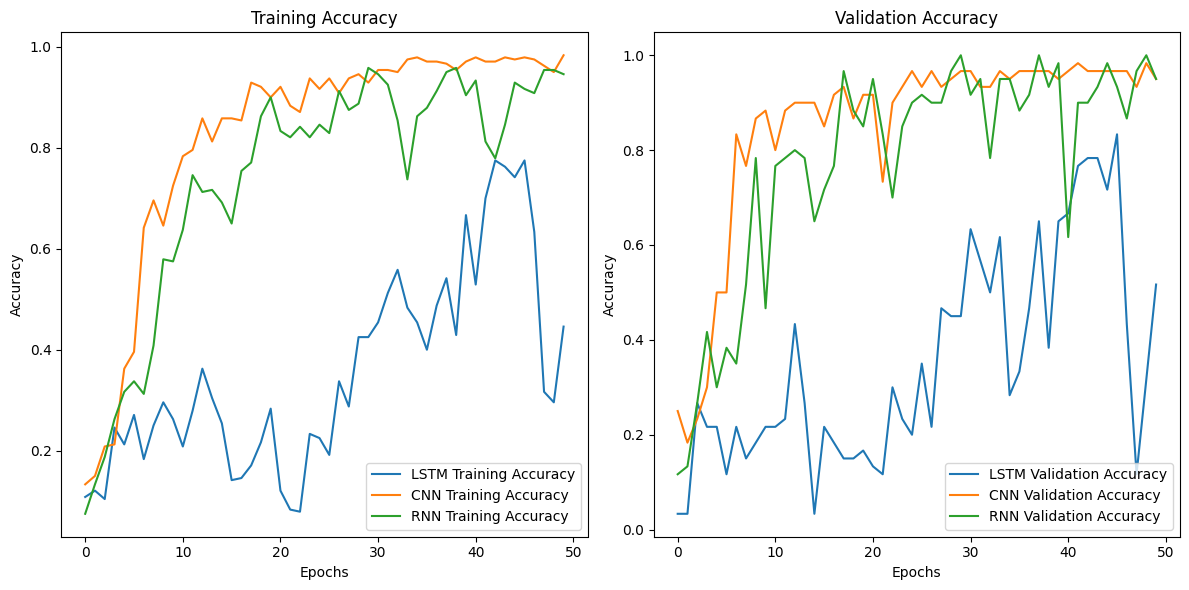

In [41]:
# Plotting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['categorical_accuracy'], label='LSTM Training Accuracy')
plt.plot(history_cnn.history['categorical_accuracy'], label='CNN Training Accuracy')
plt.plot(history_rnn.history['categorical_accuracy'], label='RNN Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['val_categorical_accuracy'], label='LSTM Validation Accuracy')
plt.plot(history_cnn.history['val_categorical_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_rnn.history['val_categorical_accuracy'], label='RNN Validation Accuracy')
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [36]:
y_true = np.argmax(y_test, axis=1)


prob_lstm = lstm_model.predict(X_test)
prob_cnn = cnn_model.predict(X_test)
prob_rnn = rnn_model.predict(X_test)

# Convert probabilities to predicted labels
y_pred_lstm = np.argmax(prob_lstm, axis=1)
y_pred_cnn = np.argmax(prob_cnn, axis=1)
y_pred_rnn = np.argmax(prob_rnn, axis=1)

from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculate metrics for LSTM
precision_lstm, recall_lstm, f1_score_lstm, _ = precision_recall_fscore_support(y_true, y_pred_lstm, average='weighted')
accuracy_lstm = accuracy_score(y_true, y_pred_lstm)

# Calculate metrics for CNN
precision_cnn, recall_cnn, f1_score_cnn, _ = precision_recall_fscore_support(y_true, y_pred_cnn, average='weighted')
accuracy_cnn = accuracy_score(y_true, y_pred_cnn)

# Calculate metrics for RNN
precision_rnn, recall_rnn, f1_score_rnn, _ = precision_recall_fscore_support(y_true, y_pred_rnn, average='weighted')
accuracy_rnn = accuracy_score(y_true, y_pred_rnn)

# Print metrics
print(f"LSTM - Precision: {precision_lstm:.4f}, Recall: {recall_lstm:.4f}, F1-Score: {f1_score_lstm:.4f}, Accuracy: {accuracy_lstm:.4f}")
print(f"CNN - Precision: {precision_cnn:.4f}, Recall: {recall_cnn:.4f}, F1-Score: {f1_score_cnn:.4f}, Accuracy: {accuracy_cnn:.4f}")
print(f"RNN - Precision: {precision_rnn:.4f}, Recall: {recall_rnn:.4f}, F1-Score: {f1_score_rnn:.4f}, Accuracy: {accuracy_rnn:.4f}")

2/2 [==============================] - 0s 15ms/step
LSTM - Precision: 0.5472, Recall: 0.5167, F1-Score: 0.4329, Accuracy: 0.5167
CNN - Precision: 0.9650, Recall: 0.9500, F1-Score: 0.9476, Accuracy: 0.9500
RNN - Precision: 0.9600, Recall: 0.9500, F1-Score: 0.9505, Accuracy: 0.9500


c:\Users\boyca\.conda\envs\Carm3.0\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2/2 [==============================] - 0s 16ms/step


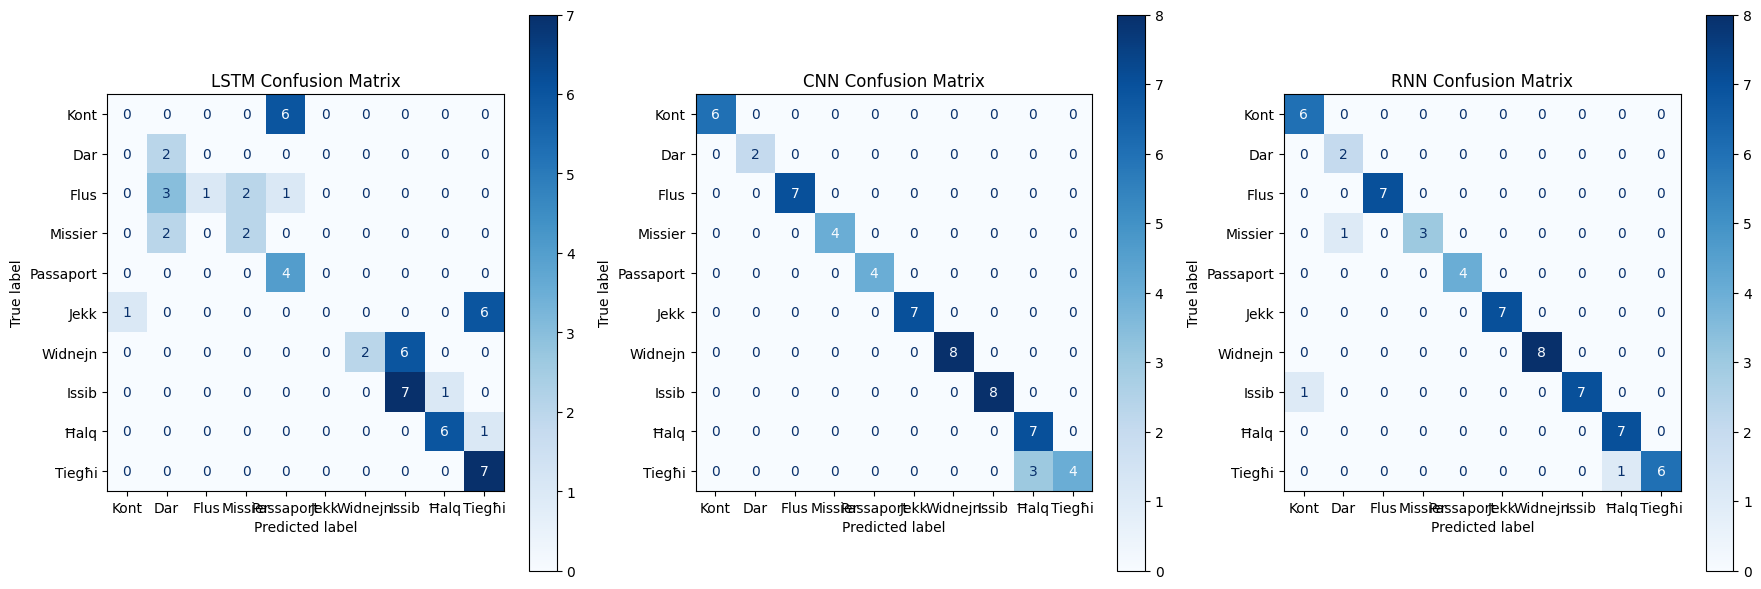

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming X_test is your test dataset
# Predict the classes
y_pred_lstm = np.argmax(lstm_model.predict(X_test), axis=1)
y_pred_cnn = np.argmax(cnn_model.predict(X_test), axis=1)
y_pred_rnn = np.argmax(rnn_model.predict(X_test), axis=1)

# True labels
y_true = np.argmax(y_test, axis=1)

# Confusion Matrices
cm_lstm = confusion_matrix(y_true, y_pred_lstm)
cm_cnn = confusion_matrix(y_true, y_pred_cnn)
cm_rnn = confusion_matrix(y_true, y_pred_rnn)

# Display Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ConfusionMatrixDisplay(cm_lstm, display_labels=actions).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('LSTM Confusion Matrix')

ConfusionMatrixDisplay(cm_cnn, display_labels=actions).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('CNN Confusion Matrix')

ConfusionMatrixDisplay(cm_rnn, display_labels=actions).plot(ax=axes[2], cmap='Blues')
axes[2].set_title('RNN Confusion Matrix')

plt.tight_layout()
plt.show()


2/2 [==============================] - 0s 14ms/step


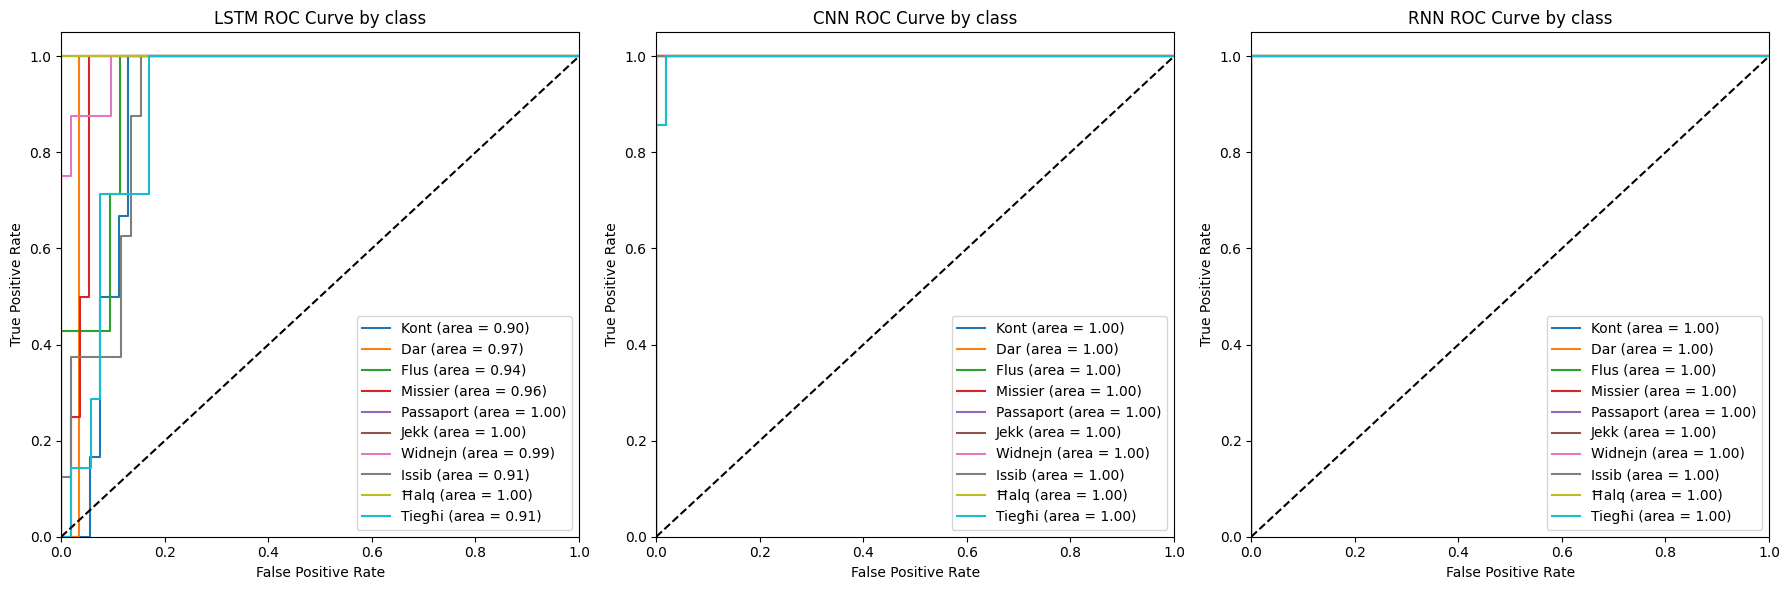

In [38]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels
y_test_binarized = label_binarize(y_true, classes=np.arange(num_classes))

# Predict probabilities for each class
prob_lstm = lstm_model.predict(X_test)
prob_cnn = cnn_model.predict(X_test)
prob_rnn = rnn_model.predict(X_test)

# Plot ROC curves
plt.figure(figsize=(18, 6))

for i, model_probs in enumerate([(prob_lstm, 'LSTM'), (prob_cnn, 'CNN'), (prob_rnn, 'RNN')]):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for j in range(num_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_binarized[:, j], model_probs[0][:, j])
        roc_auc[j] = auc(fpr[j], tpr[j])

    # Plot the ROC curve for each class
    plt.subplot(1, 3, i+1)
    for j in range(num_classes):
        plt.plot(fpr[j], tpr[j], label=f'{actions[j]} (area = {roc_auc[j]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_probs[1]} ROC Curve by class')
    plt.legend(loc="lower right")

plt.tight_layout()
plt.show()


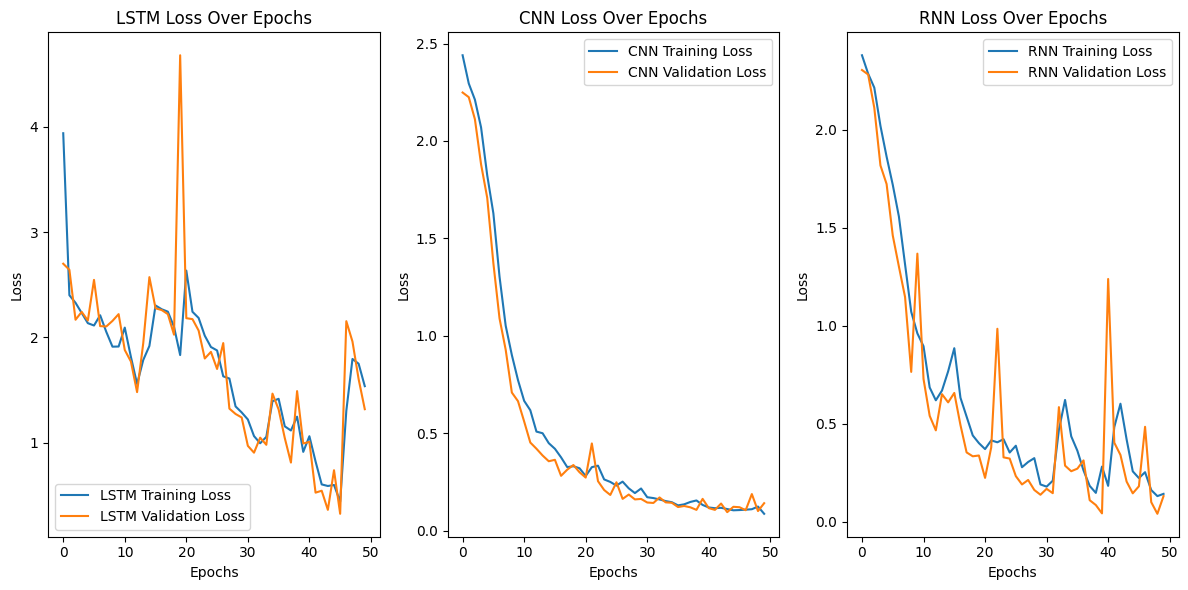

In [39]:
plt.figure(figsize=(12, 6))

# Plot training and validation loss for each model
plt.subplot(1, 3, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.title('CNN Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(history_rnn.history['loss'], label='RNN Training Loss')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [40]:
def check_overfitting(history):
    # Get the last training and validation loss
    last_train_loss = history.history['loss'][-1]
    last_val_loss = history.history['val_loss'][-1]
    
    # Calculate the difference
    loss_diff = last_val_loss - last_train_loss
    
    # Define a threshold for what you consider significant; this is somewhat arbitrary and may depend on your problem
    threshold = 0.1
    
    overfitting = "Yes" if loss_diff > threshold else "No"
    
    return overfitting, last_train_loss, last_val_loss

overfitting_lstm, lstm_train_loss, lstm_val_loss = check_overfitting(history_lstm)
overfitting_cnn, cnn_train_loss, cnn_val_loss = check_overfitting(history_cnn)
overfitting_rnn, rnn_train_loss, rnn_val_loss = check_overfitting(history_rnn)

print(f"LSTM Overfitting: {overfitting_lstm}, Train Loss: {lstm_train_loss:.4f}, Val Loss: {lstm_val_loss:.4f}")
print(f"CNN Overfitting: {overfitting_cnn}, Train Loss: {cnn_train_loss:.4f}, Val Loss: {cnn_val_loss:.4f}")
print(f"RNN Overfitting: {overfitting_rnn}, Train Loss: {rnn_train_loss:.4f}, Val Loss: {rnn_val_loss:.4f}")


LSTM Overfitting: No, Train Loss: 1.5357, Val Loss: 1.3170
CNN Overfitting: No, Train Loss: 0.0862, Val Loss: 0.1406
RNN Overfitting: No, Train Loss: 0.1430, Val Loss: 0.1315
